# **Unraveling Climate Change: A Comprehensive Analysis of Climate Indicators**

------------------------------------------------------------------------------------------------------------------------------------------------------------

**Project Overview:**

This project involved an in-depth exploratory data analysis (EDA) and time series analysis of climate change indicators from 1961 to 2022. The dataset, sourced from international organizations, included key metrics such as surface temperature, atmospheric CO2 levels, mean sea levels, and ocean heat content. Our goal was to uncover trends, identify highly impacted regions, and understand the interplay between these indicators. The analysis includes exploratory data analysis (EDA), time series analysis, trend detection, and forecasting using ARIMA models.

**Project Statement:**

Understanding the impact of climate change on global temperature and related indicators is crucial for formulating effective mitigation strategies. This project aims to identify trends and correlations between various climate indicators to provide actionable insights for policy makers and researchers.

**Project Objectives:**
1. Analyze Climate Change Indicators:
    - Understand trends in various climate change indicators across different nations over six decades.
    - Examine the changes in temperature, CO2 emissions, sea levels, and other relevant metrics.

2. Identify Highly Impacted Regions:
    - Pinpoint regions and countries most affected by climate change.
    - Highlight specific areas experiencing significant environmental shifts.

3. Time Series Analysis and Forecasting:
    - Conduct time series analysis to track climate change progression.
    - Utilize forecasting techniques to predict future climate impacts.

4. Understand Causes and Effects:
    - Investigate the underlying causes of climate change.
    - Analyze the effects on ecosystems, human health, and economies.

**Dataset:** https://www.kaggle.com/datasets/tarunrm09/climate-change-indicators

**Technologies Used:**
- **Python**: Utilized for initial data cleaning, Exploratory Data Analysis (EDA), and generating insights through statistical analysis and visualization
- **Jupyter Notebook and VS coder**: As an interactive environment for coding and documenting the analysis process.
- **Excel**: For initial data understanding and basic data cleaning (although the large dataset required transitioning to Python for efficiency).
- **Tableau**: Planned for creating interactive and easy-to-understand dashboards to visualize the key insights and findings from the EDA.
- **SQL**: To be integrated for advanced data querying and manipulation as part of a potential extension to the project.

Skills Demonstrated:

- Data Cleaning and Preparation (Excel)
- Exploratory Data Analysis (Python)
- Data Visualization (Tableau)
- Time Series Analysis and Forecasting
- Correlation and Trend Analysis
- ETL(Extract, Transform, Load)
- Data pipeline

**Dashboard and Story:** For a detailed visualization of the analysis and insights, view the Tableau dashboard and story here.

- Tableau Story: https://public.tableau.com/views/UnravelingClimateChangeacomprenhensiveanalysis/Story1?:language=en-US&publish=yes&:sid=&:display_count=n&:origin=viz_share_link
- Dashboard: https://public.tableau.com/shared/DJ8WKYCC5?:display_count=n&:origin=viz_share_link

### **feel free to connect:**

**Narendra Patil**

Data Analyst | Core Skills: Statistical Analysis, Problem Solving, Communication, Critical Thinking, Attention to Detail | Certified in Python, SQL, AI | Proficient in Python, SQL, Tableau, Power BI

- LinkedIn : https://www.linkedin.com/in/narendra-patil-583b242a1/
- Github : https://github.com/Narendraspatil
- Kaggle : https://www.kaggle.com/narendraspatil
- Instagram : https://www.instagram.com/visionindata/

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## **Importing Required librabries**

1. **pandas**: Used for data manipulation, cleaning, and analysis, particularly with structured data like tables.
2. **numpy**: Provides support for large, multi-dimensional arrays and matrices, along with a collection of mathematical functions to operate on these arrays.
3. **matplotlib**: Used for creating plots and charts to visualize data in various formats, including line plots, histograms, scatter plots, etc.
4. **seaborn**: Provides a high-level interface for drawing attractive and informative statistical graphics, enhancing the visual appeal of plots created with Matplotlib.
5. **plotly**: Enables rapid creation of interactive plots, including scatter plots, line plots, histograms, etc., with minimal code.
6. **statsmodels.api**: Used for statistical modeling, hypothesis testing, and performing various statistical analyses, including regression analysis, time series analysis, etc.
9. **statsmodels.tsa.arima.model (ARIMA)**: Used for fitting and forecasting time series data, particularly when the data exhibit autocorrelation and/or seasonality.
10. **sklearn.linear_model**: Used for building and fitting linear regression models to predict the relationship between one or more independent variables and a dependent variable.
11. **statsmodels.nonparametric.smoothers_lowess (lowess)**: Used for estimating and visualizing trends in noisy data by smoothing out fluctuations and identifying underlying patterns.
12. **ruptures**: Provides algorithms for detecting abrupt changes or breakpoints in time series data, enabling the identification of significant shifts in patterns or trends.

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import statsmodels.api as sm 
from statsmodels.tsa.stattools import adfuller, acf, pacf
import warnings
from statsmodels.tsa.arima.model import ARIMA
from sklearn.linear_model import LinearRegression
from statsmodels.nonparametric.smoothers_lowess import lowess
import ruptures as rpt

## **Loading the Cleaned Climate Change Dataset**

Initial **Data Cleaning and Initial Exploration Steps followed in Excel**: 

1. **Understanding the Data** - Opened the dataset to get an overview of the columns and data types.
2. **Dropping Unnecessary Columns** - Deleted columns: ObjectId, ISO2, ISO3, Indicator, Unit, Source, CTS_Code, CTS_Name, CTS_Full_Descriptor.
3. **Dropping 'F' from Year Columns** - Used Find and Replace (Ctrl+H) to remove 'F' from year columns.
4. **Checking for Null Values** - Selected blanks using Go To Special > Blanks.
5. **Filling Null Values** - Filled null values with the average value of the respective year column using =AVERAGE(range).
6. **Checking for Duplicated Values** - Removed duplicates using the Remove Duplicates feature in the Data tab.
7. **Exporting the Fil**e - Saved the cleaned dataset as a CSV file for use in Python.

In [2]:
# Load the cleaned data
df = pd.read_csv('cleaned_CCI.csv')

## **Data Overview**

In [3]:
# Display the first few rows
df.head()

,Country,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,"Afghanistan, Islamic Rep. of",-0.113,-0.164,0.847,-0.764,-0.244,0.226,-0.371,-0.423,-0.539,...,1.281,0.456,1.093,1.555,1.540,1.544,0.910,0.498,1.327,2.012
1,Albania,0.627,0.326,0.075,-0.166,-0.388,0.559,-0.074,0.081,-0.013,...,1.333,1.198,1.569,1.464,1.121,2.028,1.675,1.498,1.536,1.518
2,Algeria,0.164,0.114,0.077,0.250,-0.100,0.433,-0.026,-0.067,0.291,...,1.192,1.690,1.121,1.757,1.512,1.210,1.115,1.926,2.330,1.688
3,American Samoa,0.079,-0.042,0.169,-0.140,-0.562,0.181,-0.368,-0.187,0.132,...,1.257,1.170,1.009,1.539,1.435,1.189,1.539,1.430,1.268,1.256
4,"Andorra, Principality of",0.736,0.112,-0.752,0.308,-0.490,0.415,0.637,0.018,-0.137,...,0.831,1.946,1.690,1.990,1.925,1.919,1.964,2.562,1.533,3.243


In [4]:
# Shape of the dataset
print(f'The dataset has {df.shape[0]} rows and {df.shape[1]} columns.')

The dataset has 224 rows and 63 columns.


In [5]:
# Column names
print(df.columns)

Index(['Country', '1961', '1962', '1963', '1964', '1965', '1966', '1967',
       '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976',
       '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985',
       '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994',
       '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003',
       '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021',
       '2022'],
      dtype='object')


In [6]:
# Data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 63 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  224 non-null    object 
 1   1961     224 non-null    float64
 2   1962     224 non-null    float64
 3   1963     224 non-null    float64
 4   1964     224 non-null    float64
 5   1965     224 non-null    float64
 6   1966     224 non-null    float64
 7   1967     224 non-null    float64
 8   1968     224 non-null    float64
 9   1969     224 non-null    float64
 10  1970     224 non-null    float64
 11  1971     224 non-null    float64
 12  1972     224 non-null    float64
 13  1973     224 non-null    float64
 14  1974     224 non-null    float64
 15  1975     224 non-null    float64
 16  1976     224 non-null    float64
 17  1977     224 non-null    float64
 18  1978     224 non-null    float64
 19  1979     224 non-null    float64
 20  1980     224 non-null    float64
 21  1981     224 non

In [7]:
# Number of distinct countries
print(f'Number of distinct countries: {df["Country"].nunique()}')

Number of distinct countries: 224


In [8]:
# Summary statistics
df.describe()

,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
count,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,...,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000
mean,0.160830,-0.009152,0.009964,-0.086674,-0.245594,0.115442,-0.112629,-0.201201,0.161576,0.094487,...,0.928263,1.106612,1.264402,1.438067,1.282781,1.296661,1.435487,1.535112,1.342558,1.370491
std,0.400065,0.342407,0.391686,0.307657,0.281670,0.374010,0.341463,0.276734,0.310199,0.347662,...,0.317371,0.562165,0.472770,0.408198,0.394003,0.592414,0.474746,0.640105,0.488458,0.665712
min,-0.694000,-0.908000,-1.270000,-0.877000,-1.064000,-1.801000,-1.048000,-1.634000,-0.900000,-1.288000,...,0.118000,-0.092000,-0.430000,0.250000,0.017000,0.238000,0.050000,0.229000,-0.425000,-1.305000
25%,-0.101000,-0.164000,-0.203250,-0.246000,-0.392500,-0.048750,-0.269000,-0.366500,-0.009000,-0.055250,...,0.747750,0.744000,1.022500,1.146750,1.030500,0.877000,1.157500,1.134000,1.019750,0.874750
50%,0.064500,-0.056000,0.037000,-0.075000,-0.226000,0.098000,-0.140000,-0.189000,0.198000,0.129500,...,0.897000,0.985500,1.214000,1.444500,1.282000,1.124000,1.407500,1.453000,1.338000,1.303500
75%,0.276750,0.125250,0.235000,0.117000,-0.089250,0.288500,0.019000,-0.066750,0.347000,0.302750,...,1.182250,1.324250,1.516500,1.702000,1.527000,1.679250,1.692000,1.790500,1.625250,1.907250
max,1.892000,0.998000,1.202000,1.097000,0.857000,1.151000,1.134000,0.476000,0.939000,0.978000,...,1.643000,2.704000,2.613000,2.459000,2.493000,2.772000,2.689000,3.691000,2.676000,3.243000


## **Separating Dataframe into world and countries dataframes**

The dataset includes an entry labeled 'World' that represents the average temperature change globally for each year. To avoid any interference with country-specific analyses and to facilitate a focused examination of global temperature changes, we separate this 'World' entry into a distinct dataframe (world_df). This allows us to analyze temperature changes at the global level independently from the country-level data.

In [9]:
# Separate the 'World' data
world_df = df[df['Country'] == 'World']

# Separate the countries data
countries_df = df[df['Country'] != 'World']

In [10]:
# Display first few rows of both dataframes
world_df.head()

,Country,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
220,World,0.211,0.038,0.168,-0.246,-0.223,0.201,-0.117,-0.126,-0.092,...,1.016,1.053,1.412,1.66,1.429,1.29,1.444,1.711,1.447,1.394


In [11]:
countries_df.head()

,Country,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,"Afghanistan, Islamic Rep. of",-0.113,-0.164,0.847,-0.764,-0.244,0.226,-0.371,-0.423,-0.539,...,1.281,0.456,1.093,1.555,1.540,1.544,0.910,0.498,1.327,2.012
1,Albania,0.627,0.326,0.075,-0.166,-0.388,0.559,-0.074,0.081,-0.013,...,1.333,1.198,1.569,1.464,1.121,2.028,1.675,1.498,1.536,1.518
2,Algeria,0.164,0.114,0.077,0.250,-0.100,0.433,-0.026,-0.067,0.291,...,1.192,1.690,1.121,1.757,1.512,1.210,1.115,1.926,2.330,1.688
3,American Samoa,0.079,-0.042,0.169,-0.140,-0.562,0.181,-0.368,-0.187,0.132,...,1.257,1.170,1.009,1.539,1.435,1.189,1.539,1.430,1.268,1.256
4,"Andorra, Principality of",0.736,0.112,-0.752,0.308,-0.490,0.415,0.637,0.018,-0.137,...,0.831,1.946,1.690,1.990,1.925,1.919,1.964,2.562,1.533,3.243


## **Exploratory Data Analysis of the climate change indicators**

In [12]:
# Melt the dataframe to long format
countries_melted = countries_df.melt(id_vars='Country', var_name='Year', value_name='Temperature_Change')

# Convert Year to numeric
countries_melted['Year'] = pd.to_numeric(countries_melted['Year'])

### **Average Temperature Change Throughout the Years**

c:\Users\Naren\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Naren\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


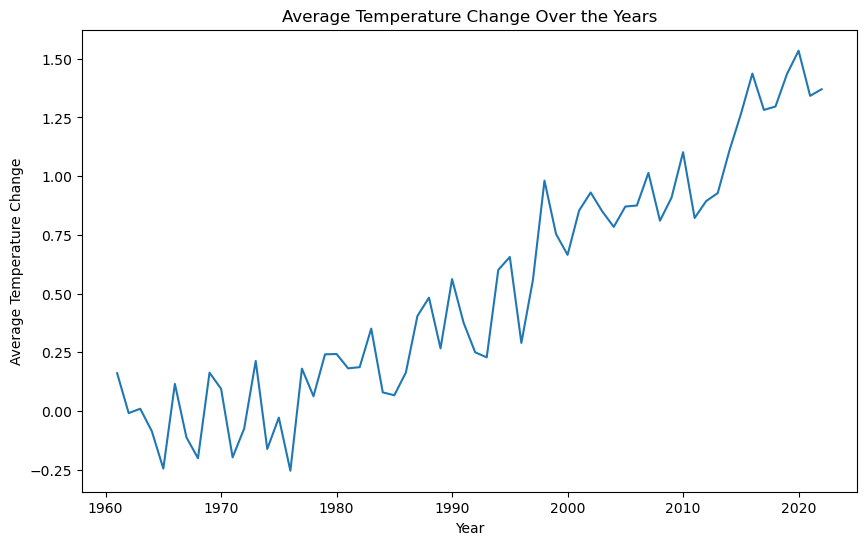

In [13]:
# Group by Year and calculate the average temperature change
avg_temp_change = countries_melted.groupby('Year')['Temperature_Change'].mean().reset_index()

# Plot average temperature change
plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_temp_change, x='Year', y='Temperature_Change')
plt.title('Average Temperature Change Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Temperature Change')
plt.show()


# Create the bar chart
fig = px.bar(avg_temp_change, x='Year', y='Temperature_Change',
             title='Average Temperature Change Over Years (World)',
             labels={'Year': 'Year', 'Temperature_Change': 'Temperature Change (°C)'},
             text='Temperature_Change',color='Temperature_Change',
             color_continuous_scale='Bluered')

# Rotate x-axis labels
fig.update_layout(xaxis_tickangle=-90,
                  showlegend=False,
                  width=1000,
                  height=600,
                  coloraxis_showscale=False)

# Show the plot
fig.show()

- These graphs represents the average temperature change globally from 1961 to 2022. 
- Over this period, there is a clear upward trend, indicating a significant increase in average temperatures. 
- Notably, the temperature change has become more pronounced since 1980s, with recent years showing the highest levels of temperature increase.

### **Countrywise distribution of Temperature change over the years**

![regional temp variation.png](<attachment:regional temp variation.png>)
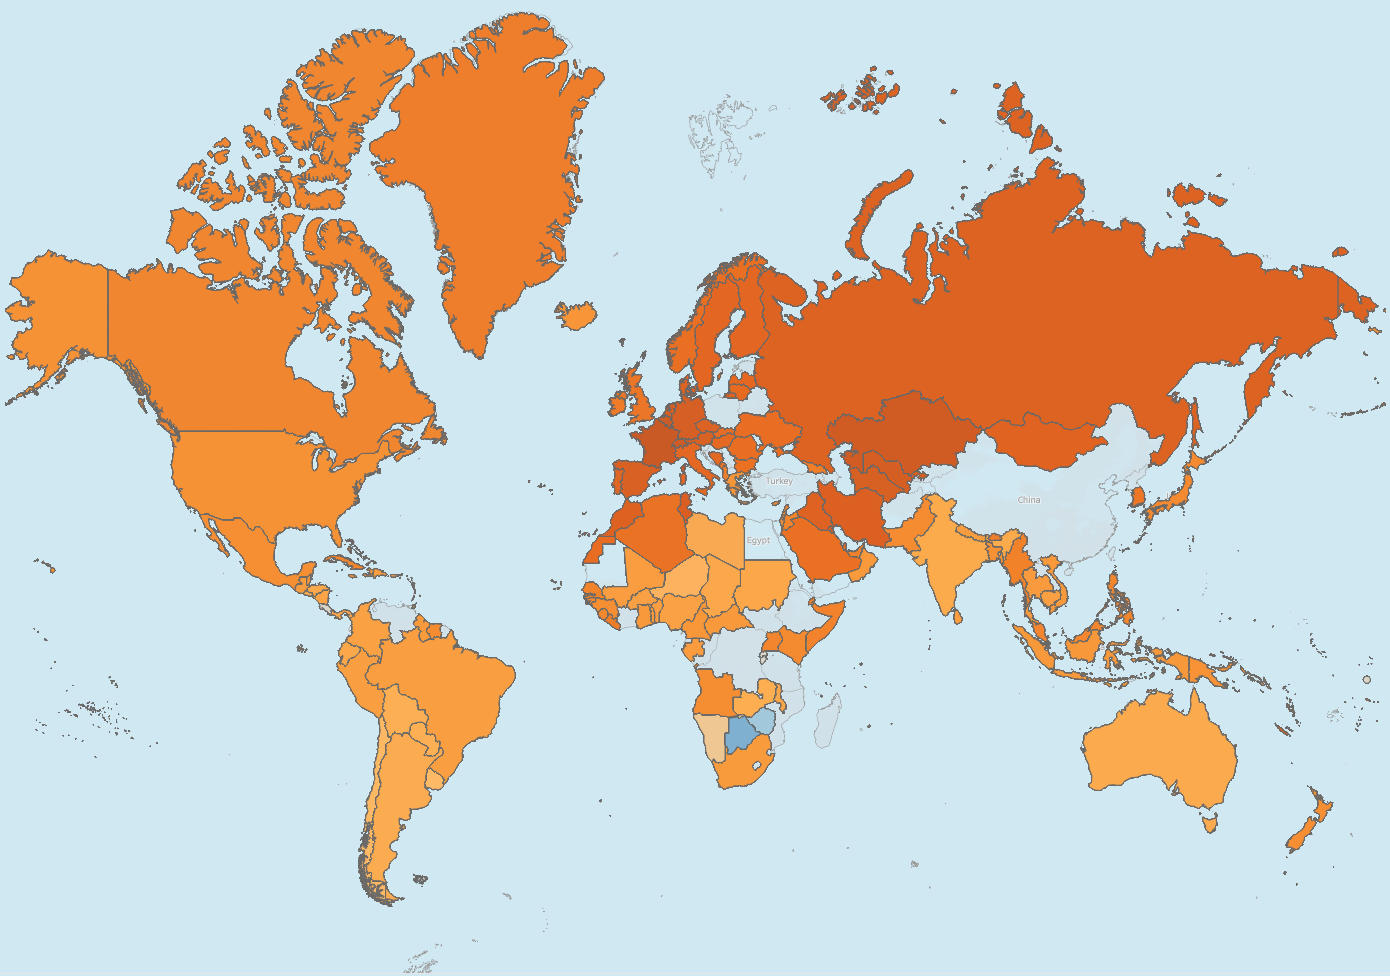

### **Max and Min Temperature Change and Year**

In [14]:
max_temp_change = countries_melted.loc[countries_melted['Temperature_Change'].idxmax()]
print(f'Max Temperature Change: {max_temp_change["Temperature_Change"]} in {max_temp_change["Year"]} in {max_temp_change["Country"]}')

min_temp_change = countries_melted.loc[countries_melted['Temperature_Change'].idxmin()]
print(f'Min Temperature Change: {min_temp_change["Temperature_Change"]} in {min_temp_change["Year"]} in {min_temp_change["Country"]}')

Max Temperature Change: 3.691 in 2020 in Russian Federation
Min Temperature Change: -2.062 in 1983 in Greenland


### **Top Countries with Maximum and Minimum Temperature Change**

In [15]:
# Calculate total temperature change for each country
country_temp_change = countries_melted.groupby('Country')['Temperature_Change'].mean().reset_index()

In [16]:
# Find top countries with maximum temperature change
top_countries_max = country_temp_change.nlargest(10, 'Temperature_Change')

In [17]:
fig = px.bar(top_countries_max, x='Temperature_Change', y='Country', color='Country',
             labels={'Temperature_Change': 'Average Temperature Change', 'Country': 'Country'},
             title='Top 10 Countries with Maximum Avg Temperature Change')
fig.update_layout(showlegend=False,
                  width=1000,height=500)
fig.show()

- The bar graph reveals that the top 10 countries experiencing the maximum average temperature change are mostly concentrated in Europe and Northern Asia. Mongolia, which tops the list, is located in Northern Asia, while countries like Serbia, Montenegro, Latvia, Estonia, Lithuania, Austria, and Slovenia are all European nations.
- This geographical distribution suggests that these regions have faced more pronounced warming trends compared to the rest of the world. 
- Europe and Northern Asia have experienced faster rises in average temperatures, likely due to factors such as their high-latitude locations, urbanization patterns, and potential impacts of climate feedback mechanisms like melting permafrost and sea ice loss.

In [18]:
# Find top countries with minmum temperature change
top_countries_min = country_temp_change.nsmallest(10, 'Temperature_Change')

fig = px.bar(top_countries_min, x='Temperature_Change', y='Country', color='Country',
             labels={'Temperature_Change': 'Average Temperature Change', 'Country': 'Country'},
             title='Top 10 Countries with Maximum Avg Temperature Change')
fig.update_layout(showlegend=False,
                  width=1000,height=500)
fig.show()

- The graph highlights that small island nations like Cook Islands, Micronesia, Pitcairn Islands, and Marshall Islands have experienced the least average temperature change compared to other countries. This could be attributed to the moderating influence of the surrounding ocean on island climates.
- Interestingly, some landlocked countries like Zimbabwe, Botswana, and Nepal also feature among those with minimal temperature changes. This may be related to factors like elevation, local climate patterns, or potential data limitations for these regions.
- The overall magnitude of temperature change in these countries is relatively small compared to the countries experiencing maximum temperature changes shown in the previous graph. This suggests significant regional variations in the extent of warming observed across different parts of the world.

### **Regional Analysis of Temperature Change:**

In [19]:
# Define a dictionary mapping countries to continents
africa_countries = ['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cameroon', 'Central African Rep.', 'Chad', 'Comoros, Union of the', 'Congo, Dem. Rep. of the', 'Congo, Rep. of', 'Côte d\'Ivoire', 'Djibouti', 'Egypt, Arab Rep. of', 'Equatorial Guinea, Rep. of', 'Eritrea, The State of', 'Eswatini, Kingdom of', 'Ethiopia, The Federal Dem. Rep. of', 'Gabon', 'Gambia, The', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Kenya', 'Lesotho, Kingdom of', 'Liberia', 'Libya', 'Madagascar, Rep. of', 'Malawi', 'Mali', 'Mauritania, Islamic Rep. of', 'Mauritius', 'Mayotte', 'Morocco', 'Mozambique, Rep. of', 'Namibia', 'Niger', 'Nigeria', 'Réunion', 'Rwanda', 'Saint Helena', 'São Tomé and Príncipe, Dem. Rep. of', 'Senegal', 'Seychelles', 'Sierra Leone', 'Somalia', 'South Africa', 'South Sudan, Rep. of', 'Sudan', 'Tanzania, United Rep. of', 'Togo', 'Tunisia', 'Uganda', 'Western Sahara', 'Zambia', 'Zimbabwe']
asia_countries = ['Afghanistan, Islamic Rep. of', 'Armenia, Rep. of', 'Azerbaijan, Rep. of', 'Bahrain, Kingdom of', 'Bangladesh', 'Bhutan', 'Brunei Darussalam', 'Cambodia', 'China, P.R.: Hong Kong', 'China, P.R.: Macao', 'China, P.R.: Mainland', 'Georgia', 'India', 'Indonesia', 'Iran, Islamic Rep. of', 'Iraq', 'Israel', 'Japan', 'Jordan', 'Kazakhstan, Rep. of', 'Korea, Dem. People\'s Rep. of', 'Korea, Rep. of', 'Kuwait', 'Kyrgyz Rep.', 'Lao People\'s Dem. Rep.', 'Lebanon', 'Malaysia', 'Maldives', 'Mongolia', 'Myanmar', 'Nepal', 'Oman', 'Pakistan', 'Philippines', 'Qatar', 'Russian Federation', 'Saudi Arabia', 'Singapore', 'Sri Lanka', 'Syrian Arab Rep.', 'Taiwan Province of China', 'Tajikistan, Rep. of', 'Thailand', 'Timor-Leste, Dem. Rep. of', 'Turkey', 'Turkmenistan', 'United Arab Emirates', 'Uzbekistan, Rep. of', 'Vietnam', 'Yemen, Rep. of', 'West Bank and Gaza']
europe_countries =  ['Albania', 'Andorra, Principality of', 'Austria', 'Belarus, Rep. of', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria', 'Croatia, Rep. of', 'Cyprus', 'Czech Rep.', 'Denmark', 'Estonia, Rep. of', 'Faroe Islands', 'Finland', 'France', 'Germany', 'Gibraltar', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Isle of Man', 'Italy', 'Latvia', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malta', 'Moldova, Rep. of', 'Monaco', 'Montenegro', 'Netherlands, The', 'North Macedonia, Republic of', 'Norway', 'Poland, Rep. of', 'Portugal', 'Romania', 'San Marino, Rep. of', 'Serbia, Rep. of', 'Slovakia, Rep.', 'Slovenia, Rep. of', 'Spain', 'Sweden', 'Switzerland', 'Ukraine', 'United Kingdom', 'Vatican City State', 'Holy See', 'North Macedonia, Republic of', 'Slovak Rep.', 'North Macedonia, Republic of']
north_america_countries = ['American Samoa', 'Anguilla', 'Antigua and Barbuda', 'Aruba, Kingdom of the Netherlands', 'Bahamas, The', 'Barbados', 'Belize', 'Bermuda', 'Bonaire, Sint Eustatius and Saba', 'British Virgin Islands', 'Canada', 'Cayman Islands', 'Costa Rica', 'Cuba', 'Curaçao', 'Dominica', 'Dominican Rep.', 'El Salvador', 'Greenland', 'Grenada', 'Guadeloupe', 'Guam', 'Guatemala', 'Haiti', 'Honduras', 'Jamaica', 'Martinique', 'Mexico', 'Montserrat', 'Nicaragua', 'Panama', 'Puerto Rico', 'Saint Barthélemy', 'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Martin (French part)', 'Saint Vincent and the Grenadines', 'Sint Maarten (Dutch part)', 'Trinidad and Tobago', 'Turks and Caicos Islands', 'United States', 'United States Virgin Islands', 'Saint Pierre and Miquelon', 'St. Kitts and Nevis','St. Lucia', 'St. Vincent and the Grenadines']
oceania_countries = ['Australia', 'Fiji, Rep. of', 'Kiribati', 'Marshall Islands, Rep. of the', 'Micronesia, Federated States of', 'Nauru, Rep. of', 'New Caledonia', 'New Zealand', 'Niue', 'Norfolk Island', 'Palau, Rep. of', 'Papua New Guinea', 'Pitcairn Islands', 'Samoa', 'Solomon Islands', 'Tonga', 'Tuvalu', 'Vanuatu', 'Wallis and Futuna Islands', 'Cook Islands', 'French Polynesia', 'Tokelau']
south_america_countries = ['Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Ecuador', 'Guyana', 'Paraguay', 'Peru', 'Suriname', 'Uruguay', 'Venezuela, Rep. Bolivariana de', 'Falkland Islands (Malvinas)', ]

# Dictionary mapping countries to continents
country_to_continent = {}
for continent, countries in zip(['Africa', 'Asia', 'Europe', 'North America', 'South America', 'Oceania'],
                                [africa_countries, asia_countries, europe_countries, north_america_countries,
                                 south_america_countries, oceania_countries]):
    for country in countries:
        country_to_continent[country] = continent

# Add the 'Continent' column to the DataFrame
countries_melted['Continent'] = countries_melted['Country'].map(country_to_continent)

In [20]:
# Group by continent and year and calculate mean temperature change
continent_temp_change = countries_melted.groupby(['Continent', 'Year'])['Temperature_Change'].mean().reset_index()

c:\Users\Naren\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\Naren\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



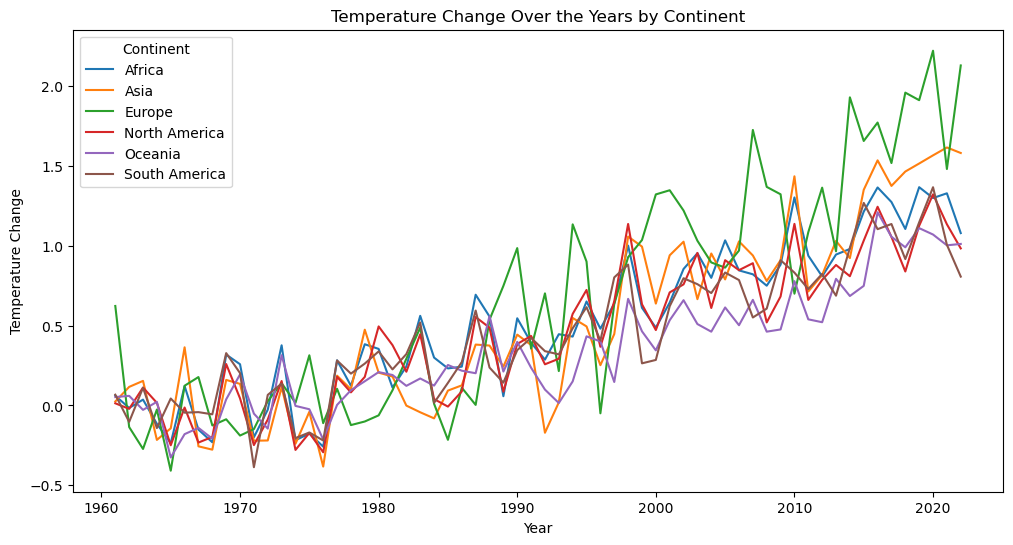

In [21]:
# Plotting continent temperature change over the years
plt.figure(figsize=(12, 6))
sns.lineplot(data=continent_temp_change, x='Year', y='Temperature_Change', hue='Continent')
plt.title('Temperature Change Over the Years by Continent')
plt.xlabel('Year')
plt.ylabel('Temperature Change')
plt.legend(title='Continent')
plt.show()

In [22]:
top_countries_per_continent = countries_melted.loc[countries_melted.groupby('Continent')['Temperature_Change'].idxmax()]

top_countries_per_continent

,Country,Year,Temperature_Change,Continent
13322,Rwanda,2020,3.691,Africa
13321,Russian Federation,2020,3.691,Asia
13219,"Estonia, Rep. of",2020,3.625,Europe
11005,Greenland,2010,3.058,North America
13745,New Caledonia,2022,2.421,Oceania
12454,Suriname,2016,1.790,South America


### **What are the Highly Impacted Regions and why?**

The provided dataset and subsequent visualizations reveal crucial insights into the regions and countries most affected by climate change. Specifically, the following observations stand out:

1. **Top Countries with Maximum Average Temperature Change:**
    - The bar graph representing the top 10 countries with the highest average temperature change clearly shows that all these countries are located in the Northern Hemisphere. Notably, most of them are situated in Europe and Northern Asia.
    - This indicates that Europe and Northern Asia are experiencing rapid warming compared to other regions of the world.

2. **Extreme Temperature Changes:**
    - The maximum temperature change recorded is 3.691°C in the Russian Federation in 2020.
    - The minimum temperature change recorded is -2.062°C in Greenland in 1983. 
    - These extreme values further emphasize the significant climatic shifts occurring in these northern regions.

**Underlying Reasons for Faster Warming in Europe and Northern Asia:**

1. **Arctic Amplification:** This phenomenon refers to the greater temperature increases in the Arctic compared to the global average. It is driven by the loss of sea ice, which reduces the albedo (reflectivity) of the surface. As ice melts, it exposes darker ocean water that absorbs more heat, leading to further warming and ice melt.

2. **Albedo Feedback:** Similar to Arctic amplification, the reduction in snow and ice cover decreases the albedo effect, causing more solar energy to be absorbed and amplifying the warming effect.

3. **Urban Heat Island Effect:** In urban areas, human activities and infrastructure (such as buildings and roads) absorb and retain heat, leading to higher temperatures. This effect is particularly noticeable in European cities.

4. **Changes in Atmospheric Circulation:** Shifts in atmospheric patterns can lead to prolonged periods of unusual weather conditions, such as heatwaves. These changes can exacerbate warming in certain regions.

5. **Permafrost Thawing:** In Northern Asia, particularly in Siberia, the thawing of permafrost releases significant amounts of greenhouse gases like methane, which further contribute to global warming.

## **Univariate and Multivariate analysis of Climate change Indicators**
1. The World Meteorological Organization (WMO) uses seven climate indicators to analyze climate change: surface temperature, ocean heat content, atmospheric carbon dioxide (CO2), ocean acidification, sea level, glacier, and Arctic & Antarctic sea ice extent.
   
2. In our analysis, we are focusing on three additional indicators: atmospheric CO2 levels, mean sea level, and ocean heat content, to understand their interactions and effects on the Earth.
   
3. We will apply both univariate and multivariate analysis methods to explore the relationships between these indicators, examining how each pair of indicators influences each other.
   
4. By analyzing these indicators together, we aim to uncover the interconnections and correlations within natural processes, recognizing that changes in one parameter can significantly impact the others.
   
5. This comprehensive approach allows us to gain a deeper understanding of the complex dynamics driving climate change and the multifaceted effects on our planet.

In [23]:
# Load additional datasets
co2_df = pd.read_csv('atmospheric co2 levels.csv')
sea_level_df = pd.read_csv('Global_sea_level_rise.csv')
ocean_heat_df = pd.read_csv('ocean_heat_anomaly.csv')

# Merge with world_df on Year
world_melted = world_df.melt(id_vars='Country', var_name='Year', value_name='Temperature_Change')
world_melted['Year'] = pd.to_numeric(world_melted['Year'])

combined_df = world_melted.merge(co2_df, on='Year').merge(sea_level_df, on='Year').merge(ocean_heat_df, on='Year')

# Display the combined dataframe
combined_df.head()

,Country,Year,Temperature_Change,Avg co2 level,Sea level change,ocean heat anomaly
0,World,1979,0.226,336.85,-46.814062,-1.640448
1,World,1980,0.332,338.91,-41.880729,1.813644
2,World,1981,0.443,340.11,-25.980729,0.533019
3,World,1982,0.086,340.86,-37.880729,-1.675871
4,World,1983,0.460,342.53,-22.280729,2.378227


In [24]:
world_melted

,Country,Year,Temperature_Change
0,World,1961,0.211
1,World,1962,0.038
2,World,1963,0.168
3,World,1964,-0.246
4,World,1965,-0.223
...,...,...,...
57,World,2018,1.290
58,World,2019,1.444
59,World,2020,1.711
60,World,2021,1.447


### **Trend Analysis of Other Indicators:**

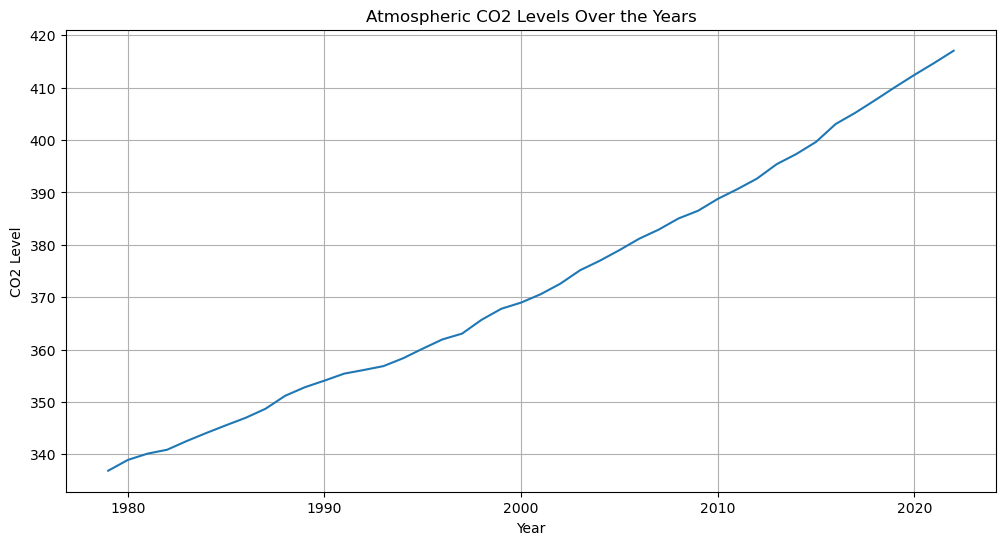

In [25]:
# CO2 Levels
plt.figure(figsize=(12, 6))
plt.plot(co2_df['Year'], co2_df['Avg co2 level'])
plt.title('Atmospheric CO2 Levels Over the Years')
plt.xlabel('Year')
plt.ylabel('CO2 Level')
plt.grid(True)
plt.show()

The trend analysis of atmospheric CO2 levels over the years reveals a consistent linear growth. From around 340 ppm in 1980 to over 415 ppm in 2022, the data clearly shows a steady increase in CO2 concentrations. This upward trend highlights the ongoing rise in greenhouse gas emissions, contributing significantly to global warming and climate change.

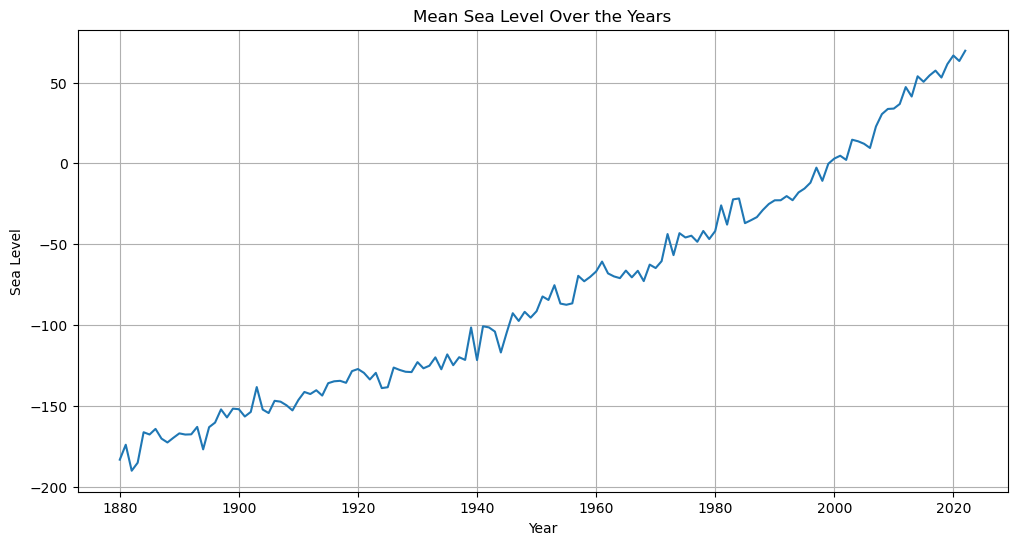

In [26]:
# Mean Sea Level
plt.figure(figsize=(12, 6))
plt.plot(sea_level_df['Year'], sea_level_df['Sea level change'])
plt.title('Mean Sea Level Over the Years')
plt.xlabel('Year')
plt.ylabel('Sea Level')
plt.grid(True)
plt.show()

The trend analysis of mean sea levels over the years demonstrates a clear linear increase. Comparing to the average from 1993 to 2008, sea levels have risen from approximately -175 mm in 1880 to over 60 mm in 2022. This consistent upward trend underscores the impact of global warming, particularly the melting of polar ice caps and thermal expansion of seawater, leading to significant changes in coastal ecosystems and human settlements.

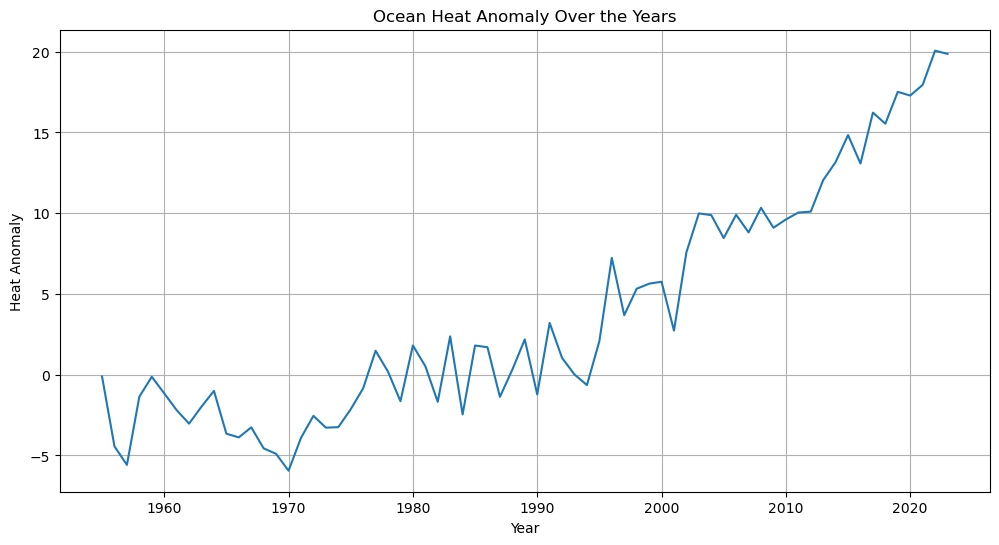

In [27]:
# Ocean Heat Anomaly
plt.figure(figsize=(12, 6))
plt.plot(ocean_heat_df['Year'], ocean_heat_df['ocean heat anomaly'])
plt.title('Ocean Heat Anomaly Over the Years')
plt.xlabel('Year')
plt.ylabel('Heat Anomaly')
plt.grid(True)
plt.show()

- 1955-1990: The ocean heat anomaly remained relatively stable, fluctuating between 5 to -5 x 10^22 Joules. This period indicates a balanced heat distribution within the ocean.
- 1990-2022: A significant shift occurred post-1990, characterized by a rapid increase in the ocean heat anomaly. This rise escalated over the years, culminating in an anomaly of around 20 x 10^22 Joules by 2022.

This trend suggests a pronounced accumulation of heat within the oceanic system, possibly indicative of underlying climate change dynamics and altered heat distribution patterns.

### **Univariate Analysis**
Univariate analysis focuses on examining one variable at a time, without considering relationships with other variables.
It provides insights into the distribution, central tendency, and variability of a single variable.

c:\Users\Naren\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\Naren\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\Naren\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\Naren\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



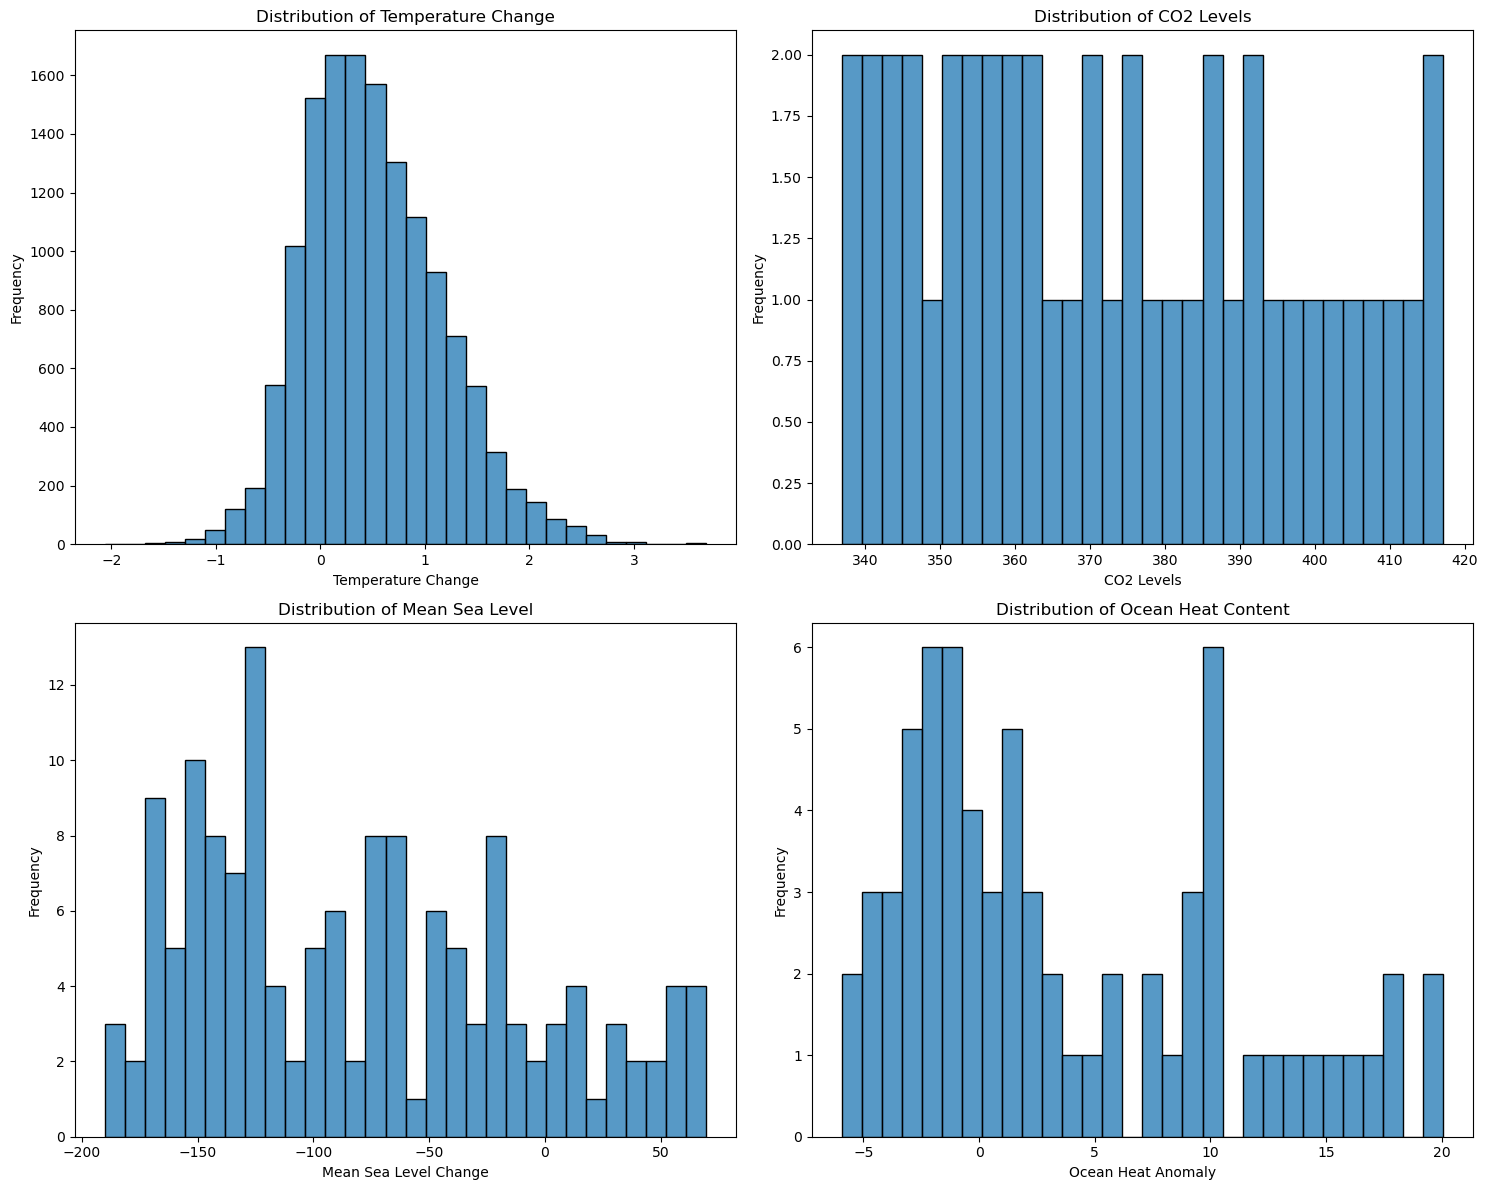

In [28]:
plt.figure(figsize=(15, 12))

# Plot for Temperature Change
plt.subplot(2, 2, 1)
sns.histplot(data=countries_melted, x='Temperature_Change', bins=30, edgecolor='black')
plt.title('Distribution of Temperature Change')
plt.xlabel('Temperature Change')
plt.ylabel('Frequency')

# Plot for CO2 Levels
plt.subplot(2, 2, 2)
sns.histplot(data=co2_df, x='Avg co2 level', bins=30, edgecolor='black')
plt.title('Distribution of CO2 Levels')
plt.xlabel('CO2 Levels')
plt.ylabel('Frequency')

# Plot for Mean Sea Level
plt.subplot(2, 2, 3)
sns.histplot(data=sea_level_df, x='Sea level change', bins=30, edgecolor='black')
plt.title('Distribution of Mean Sea Level')
plt.xlabel('Mean Sea Level Change')
plt.ylabel('Frequency')

# Plot for Ocean Heat Content
plt.subplot(2, 2, 4)
sns.histplot(data=ocean_heat_df, x='ocean heat anomaly', bins=30, edgecolor='black')
plt.title('Distribution of Ocean Heat Content')
plt.xlabel('Ocean Heat Anomaly')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

1. Distribution of Temperature Change:
    - The histogram shows a roughly normal distribution with a peak around 0°C.
    - Most temperature change values are concentrated between -1°C and 1°C.
    - The distribution is slightly skewed to the right, indicating a slightly higher frequency of positive temperature changes.

2. Distribution of CO2 Levels:
    - The histogram displays a unimodal distribution with a peak around 380 ppm (parts per million).
    - The distribution is positively skewed, with most values concentrated between 360 and 400 ppm.
    - There is a long tail towards higher CO2 levels, indicating the presence of some extreme values.

3. Distribution of Mean Sea Level Change:
    - The histogram shows a multimodal distribution with multiple peaks.
    - The distribution is centered around 0 mm, indicating an approximately equal frequency of positive and negative sea level changes.
    - There are some outliers on both the positive and negative sides, representing extreme sea level changes.

4. Distribution of Ocean Heat Content Anomaly:
    - The histogram exhibits a unimodal distribution with a peak around 0..
    - Most ocean heat content anomaly values are concentrated between -2 and 2.
    - There is a slight positive skew, suggesting a slightly higher frequency of positive ocean heat content anomalies.

#### **Multivariate Analysis:**
Multivariate analysis involves examining relationships and interactions between multiple variables simultaneously.
It allows for the exploration of complex interactions and dependencies among different climate change indicators.

c:\Users\Naren\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\Naren\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\Naren\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\Naren\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



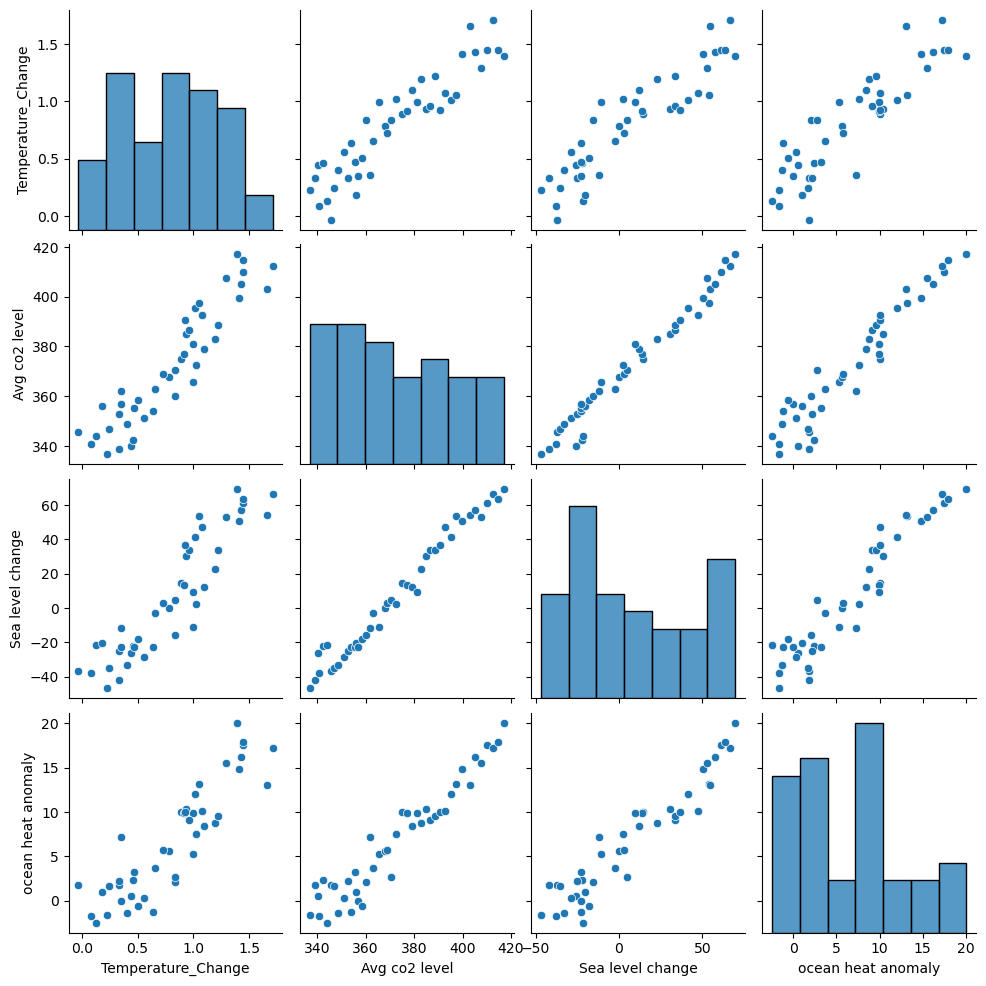

In [31]:
columns_to_drop = ['Country','Year']
combined_df = combined_df.drop(columns_to_drop, axis=1)


# Pairplot to visualize relationships between variables
sns.pairplot(combined_df)
plt.show()

- The pair plot displays the pairwise relationships between Temperature Change, Avg CO2 Level, Sea Level Change, and Ocean Heat Anomaly through scatter plots and histograms.
- The scatter plots reveal positive correlations between all pairs of variables, indicated by the upward-sloping patterns in the data points.
- The strongest positive correlation appears to be between Temperature Change and Avg CO2 Level, suggesting a direct relationship between increasing temperatures and rising CO2 levels.
- There is also a strong positive correlation between Temperature Change and Sea Level Change, indicating that higher temperatures are associated with rising sea levels.
- The correlation between Temperature Change and Ocean Heat Anomaly, while positive, appears to be slightly weaker compared to the other pairs.

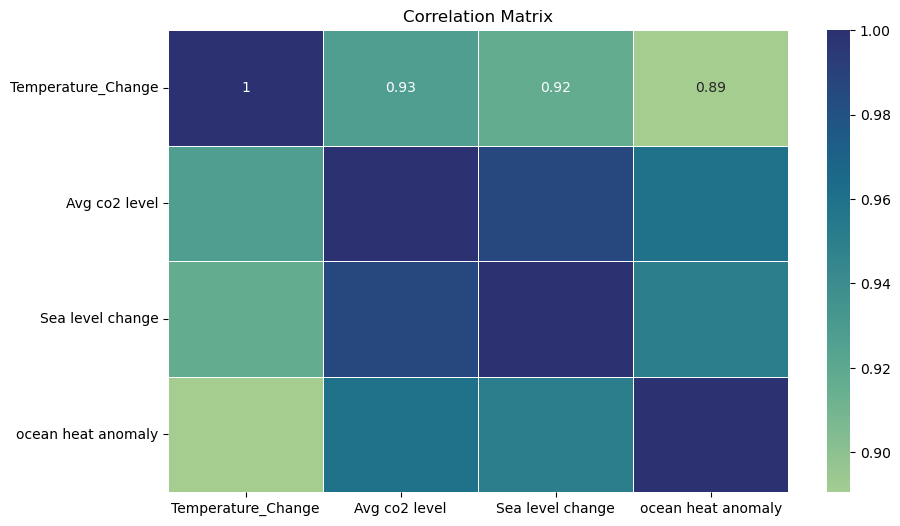

In [32]:
# Correlation matrix
corr_matrix = combined_df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='crest', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

- The correlation matrix heatmap provides a numerical representation of these relationships, with darker shades of blue indicating stronger positive correlations.
- The highest correlation coefficient of 0.98 is observed between Temperature Change and Avg CO2 Level, confirming the strong positive association seen in the pair plot.
- Sea Level Change and Ocean Heat Anomaly also exhibit high positive correlations with Temperature Change, with coefficients of 0.92 and 0.89, respectively.
- The correlations among the other pairs of variables (Avg CO2 Level, Sea Level Change, and Ocean Heat Anomaly) are also positive and relatively strong, ranging from 0.92 to 0.96.

These findings suggest that the various climate change indicators are interconnected and tend to move in the same direction, with rising temperatures being associated with increased CO2 levels, sea level rise, and higher ocean heat content.

Overall, the multivariate analysis highlights the strong positive relationships among the different climate change indicators, providing insights into the complex interplay between these variables and their potential impact on the Earth's climate system.

## **Time Series Analysis of the Temperature Change Data**

- Time series analysis is a powerful statistical technique that allows for the examination and modeling of data collected over time. 
- In the context of this project, time series analysis enables us to study the temporal patterns and trends in temperature change data spanning from 1962 to 2022.
- By analyzing the sequential observations, we can gain valuable insights into the underlying dynamics and potential drivers of temperature change over this extended period.
- Time series analysis also provides forecasting capabilities, enabling us to project future temperature trends based on historical data patterns. By employing techniques like ARIMA (Autoregressive Integrated Moving Average) models or exponential smoothing methods, we can generate temperature change forecasts that can inform climate mitigation strategies and adaptation planning.

c:\Users\Naren\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\Naren\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



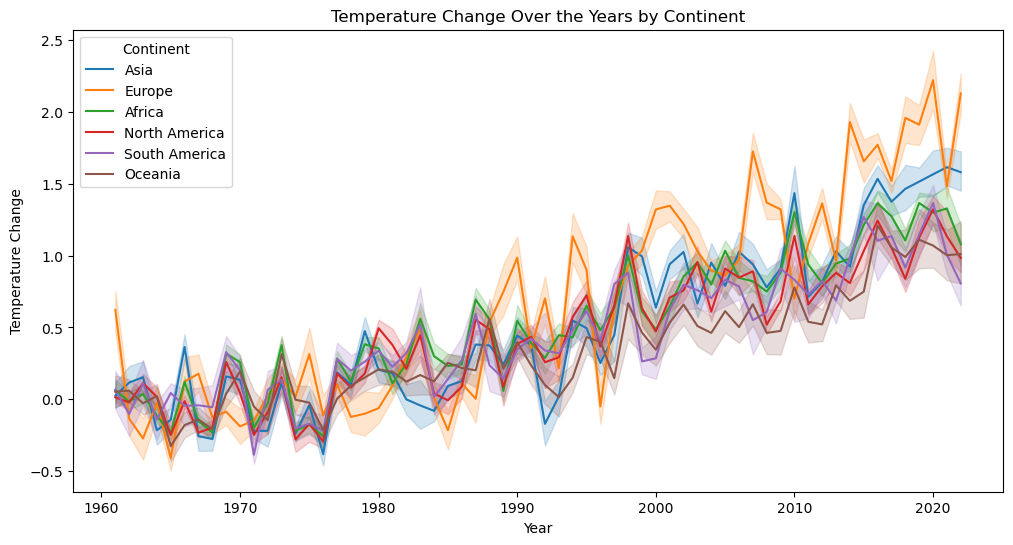

In [33]:
# Line plot for temperature change over the years
plt.figure(figsize=(12, 6))
sns.lineplot(data=countries_melted, x='Year', y='Temperature_Change', hue='Continent')
plt.title('Temperature Change Over the Years by Continent')
plt.xlabel('Year')
plt.ylabel('Temperature Change')
plt.legend(title='Continent')
plt.show()

- The graph shows a clear upward trend in temperature change across all continents from 1960 to 2022. This indicates a consistent global increase in temperatures over the past six decades, reflecting the broader patterns of global warming.
- While all continents exhibit a rising temperature trend, Europe and Asia show the most significant increases, particularly in the past few decades. Europe's temperature changes are especially pronounced, with noticeable spikes around the 1990s and 2000s.
- The graph highlights periods of significant temperature variability, especially in the earlier years (1960s-1980s). This could be attributed to various climatic and environmental factors influencing short-term temperature fluctuations. Post-2000, the variability seems to reduce slightly, indicating a more consistent rise in temperatures.
- The sharp rise in temperature changes around 2010 onwards for most continents underscores the accelerating pace of global warming in recent years. This acceleration aligns with increased industrial activities, greenhouse gas emissions, and other anthropogenic factors contributing to climate change.

### **Decomposing the time series data**

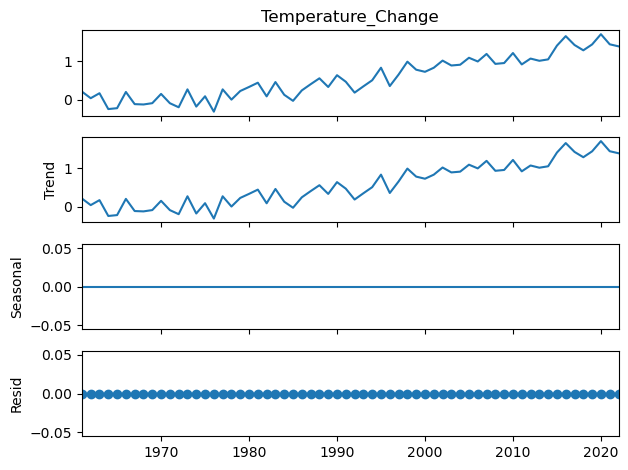

In [34]:
# Decompose the time series for the world data
world_melted = world_df.melt(id_vars='Country', var_name='Year', value_name='Temperature_Change')
world_melted['Year'] = pd.to_numeric(world_melted['Year'])

decomposition = sm.tsa.seasonal_decompose(world_melted.set_index('Year')['Temperature_Change'], model='additive', period=1)
decomposition.plot()
plt.show()

Decomposing the time series data, this analysis provides the understanding of the different components contributing to global temperature change.
- Trend component: The second subplot from the top displays the trend component of the temperature change data. It reveals a clear upward trend over the years, indicating a steady increase in global temperatures.
- Seasonal component: The third subplot shows the seasonal component of the temperature change data. It exhibits a cyclic pattern, with temperatures rising and falling within a year.
- Residual component: The bottom subplot represents the residual component, which captures the remaining variations in the data after accounting for the trend and seasonal components. The residuals appear to be relatively small in magnitude, suggesting that the trend and seasonal components explain a significant portion of the temperature change variability.
- Overall pattern: The top subplot combines all the components, presenting the original temperature change data. It clearly shows an increasing trend over time, with periodic fluctuations caused by seasonal variations.

### **Trend Analysis:**
To identify the trend in temperature changes, we employed a linear regression model. This involved fitting a straight line to the data points, which minimizes the sum of squared residuals between the observed values and the predicted values on the line. This approach allowed us to capture the long-term trend in the temperature data.

In [35]:
# Prepare the data
X = world_melted.index.values.reshape(-1, 1)
y = world_melted['Temperature_Change'].values

# Linear regression
model = LinearRegression()
model.fit(X, y)
trendline = model.predict(X)

# Print R-squared
r_squared = model.score(X, y)
print(f'R-squared: {r_squared}')

R-squared: 0.8606094012635294


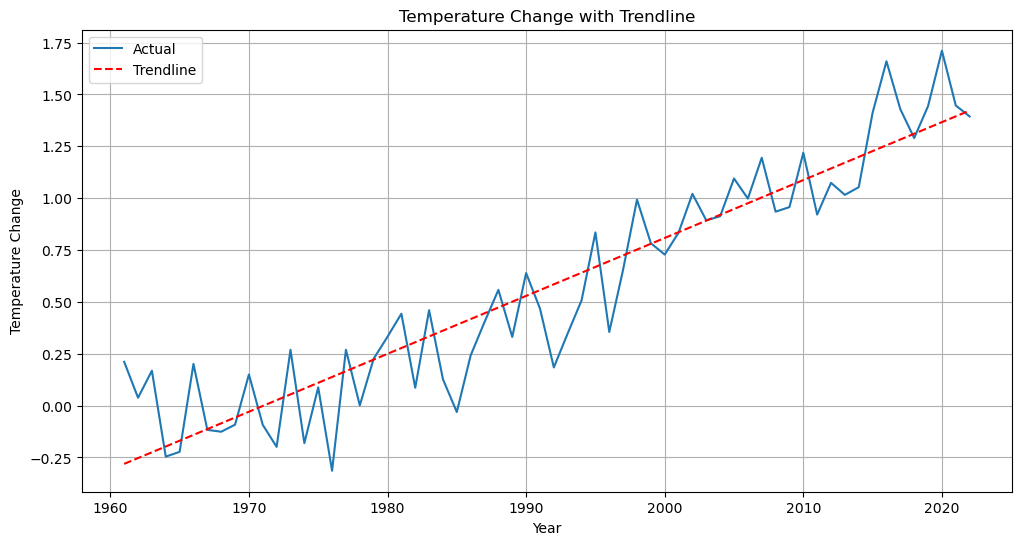

In [36]:
# Plotting
plt.figure(figsize=(12, 6))
plt.plot(world_melted['Year'], world_melted['Temperature_Change'], label='Actual')
plt.plot(world_melted['Year'], trendline, color='red', linestyle='--', label='Trendline')
plt.title('Temperature Change with Trendline')
plt.xlabel('Year')
plt.ylabel('Temperature Change')
plt.legend()
plt.grid(True)
plt.show()


1. Trendline Analysis: 
    - The red dashed trendline, derived from linear regression analysis, effectively captures the upward trend in global temperature changes. 
    - This trendline demonstrates a consistent increase in temperatures, indicating a steady rise in global warming over the observed period.

2. R-Squared Value Interpretation:
    - The linear regression model yields an R-squared value of approximately 0.861. This high R-squared value signifies that the model explains about 86% of the variance in the temperature change data. 
    - In other words, the trendline fits the data well and provides a reliable representation of the underlying trend in global temperature changes.

### **Change Point Detection:**
- Change point detection is a critical technique in time series analysis that helps identify significant shifts or structural breaks in the underlying data patterns. 
- In the context of this climate change analysis, detecting change points in the temperature change data can reveal periods when the warming trend experienced notable acceleration or deceleration.
- To detect the change points in the temperature change data, we employed the Pelt (Pruned Exact Linear Time) algorithm from the ruptures library in Python. This algorithm is designed to identify multiple change points in univariate time series data.

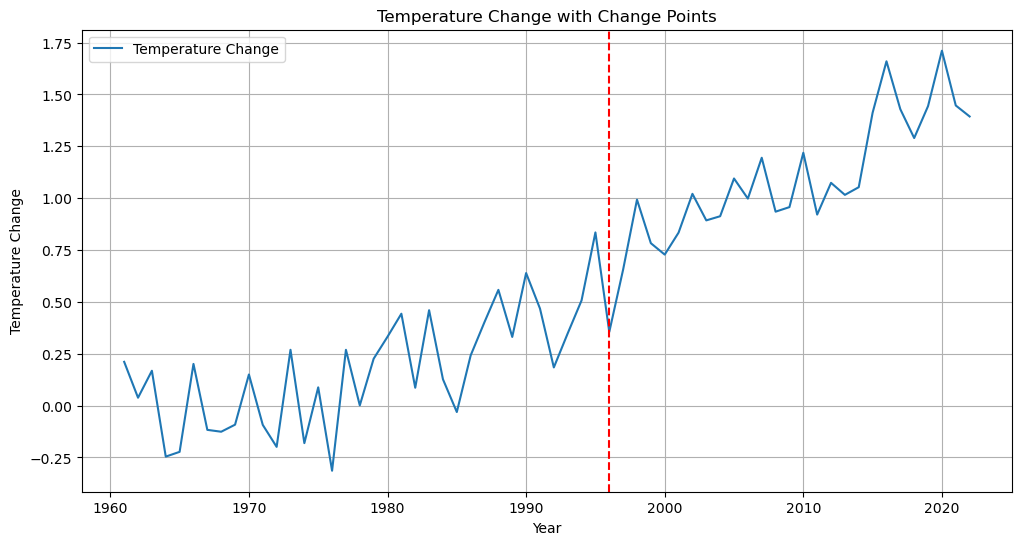

In [37]:
# Detect change points
algo = rpt.Pelt(model="rbf").fit(y)
result = algo.predict(pen=10)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(world_melted['Year'], world_melted['Temperature_Change'], label='Temperature Change')
for cp in result:
    if cp < len(world_melted['Year']):
        plt.axvline(x=world_melted['Year'][cp], color='red', linestyle='--')
plt.title('Temperature Change with Change Points')
plt.xlabel('Year')
plt.ylabel('Temperature Change')
plt.legend()
plt.grid(True)
plt.show()

- The graph illustrates the temperature change data over time, with vertical red dashed lines indicating the detected change points. 
- These change points represent years or time periods where the temperature change trend underwent a statistically significant shift or break, potentially due to environmental factors, policy interventions, or other underlying causes.
- change point can be observed around the late 1990s or early 2000s, where the temperature change trend appears to transition from a relatively stable or slightly decreasing pattern to a more pronounced upward trajectory.

### **Smoothing of Time Series Data:**
- Time series data often contain noise, fluctuations, or outliers that can obscure the underlying patterns or trends. 
- Smoothing techniques aim to reduce this noise and reveal the more prominent trends or patterns in the data, making them easier to interpret and analyze.
- In this analysis, we applied the LOESS (Locally Estimated Scatterplot Smoothing) smoothing technique to the temperature change data.
- The LOESS method has the advantage of being flexible and capable of capturing non-linear patterns in the data, making it suitable for complex time series like temperature change, which may exhibit non-linear trends or patterns.

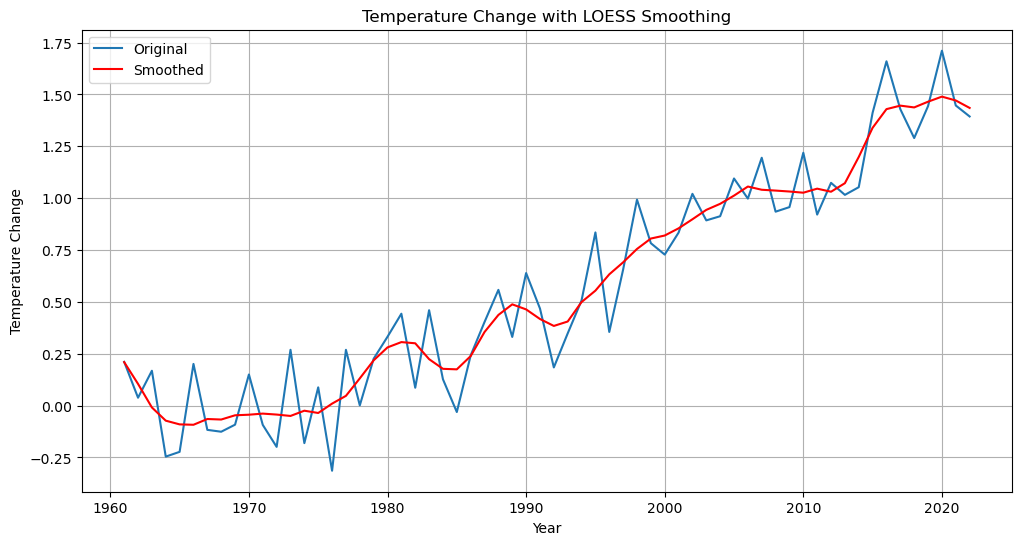

In [38]:
# Apply LOESS smoothing
smoothed = lowess(world_melted['Temperature_Change'], world_melted['Year'], frac=0.1)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(world_melted['Year'], world_melted['Temperature_Change'], label='Original')
plt.plot(smoothed[:, 0], smoothed[:, 1], color='red', label='Smoothed')
plt.title('Temperature Change with LOESS Smoothing')
plt.xlabel('Year')
plt.ylabel('Temperature Change')
plt.legend()
plt.grid(True)
plt.show()

- The graph displays both the original temperature change data (in blue) and the smoothed version (in red) after applying LOESS smoothing.
- The smoothed line (red) provides a cleaner representation of the overall trend in temperature change, effectively reducing the short-term fluctuations and noise present in the original data. 
- This smoothed line helps highlight the long-term warming trend more clearly, while still preserving the general shape and patterns of the original data.
- The smoothed line reveals a more pronounced upward trend in temperature change, particularly in recent decades, which aligns with the general scientific consensus on global warming.

### **Forecasting Using ARIMA:**
To forecast the future temperature change trends, an ARIMA (Autoregressive Integrated Moving Average) model was employed. The ARIMA model is a powerful time series forecasting technique that combines three components: autoregressive (AR), integrated (I), and moving average (MA).

The ARIMA model captures the patterns and trends in the historical data, including any seasonality or cyclical behavior, and uses this information to project future values. 

The methodology involved the following steps:
1. Identify the appropriate order of the ARIMA model (p, d, q) based on the characteristics of the data, where p is the order of the autoregressive component, d is the order of integration (differencing), and q is the order of the moving average component.
2. Fit the ARIMA model to the historical temperature change data using the identified order.
3. Forecast the temperature change values for the next 25 years using the fitted ARIMA model.
4. Generate a DataFrame containing the forecasted values and their corresponding years.
5. Visualize the historical data and the forecasted values on a line plot, allowing for a clear comparison and interpretation of the future temperature change trends.

In [39]:
world_melted = world_melted.drop('Country', axis=1)
world_melted = world_melted.set_index('Year')


In [40]:
warnings.filterwarnings('ignore')

# ADF test for stationarity
result = adfuller(world_melted['Temperature_Change'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: 1.1982211689329068
p-value: 0.995973570052519


In [41]:
# Step 2: Differencing to achieve stationarity
df_diff = world_melted.diff().dropna()
result_diff = adfuller(df_diff['Temperature_Change'])
print('ADF Statistic after differencing:', result_diff[0])
print('p-value after differencing:', result_diff[1])

ADF Statistic after differencing: -5.026619767439499
p-value after differencing: 1.965270057210551e-05


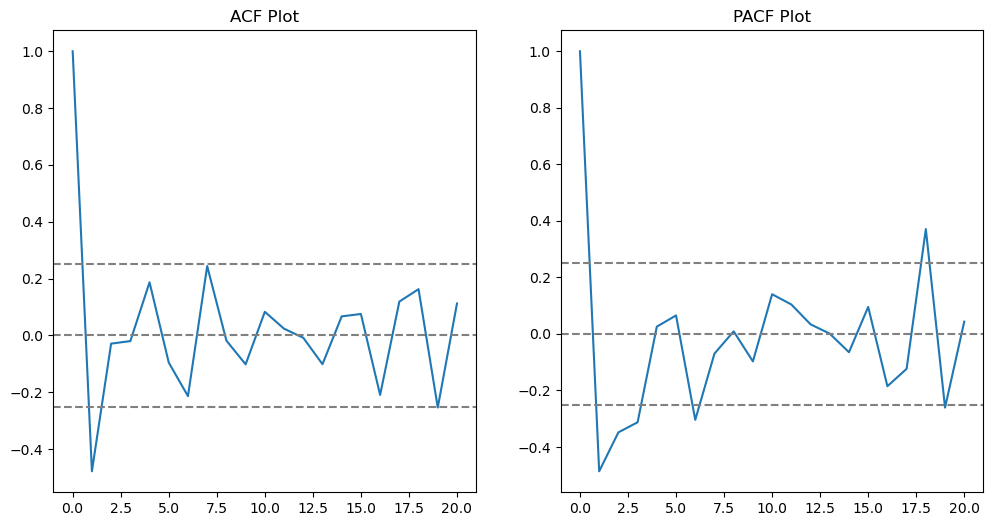

In [42]:
# Step 3: ACF and PACF plots
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.plot(acf(df_diff, nlags=20))
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_diff)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_diff)), linestyle='--', color='gray')
plt.title('ACF Plot')

plt.subplot(122)
plt.plot(pacf(df_diff, nlags=20))
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_diff)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_diff)), linestyle='--', color='gray')
plt.title('PACF Plot')
plt.show()

**Explanation for Chosen ARIMA Parameters:**
- Differencing Order (d): The Augmented Dickey-Fuller (ADF) test results indicate that the original series is non-stationary (p-value: 0.995), but after first differencing, it becomes stationary. Therefore, d=1 is appropriate.
- AR Order (p): The Partial Autocorrelation Function (PACF) plot shows a significant drop after 1, with some oscillations before stabilizing. This suggests an AR component. Typically, you might start with a few lags and increase if needed based on AIC/BIC values. In this case, p=5 was tested.
- MA Order (q): The Autocorrelation Function (ACF) plot does not show significant patterns beyond 1, suggesting that an MA term might not be necessary. Hence, q=0 was tested.

In [43]:
# Step 4: Model selection and validation
# Fit ARIMA model
model = ARIMA(world_melted['Temperature_Change'], order=(5,1,0))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:     Temperature_Change   No. Observations:                   62
Model:                 ARIMA(5, 1, 0)   Log Likelihood                   9.820
Date:                Sun, 09 Jun 2024   AIC                             -7.640
Time:                        19:04:56   BIC                              5.026
Sample:                             0   HQIC                            -2.676
                                 - 62                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6922      0.135     -5.122      0.000      -0.957      -0.427
ar.L2         -0.3997      0.173     -2.308      0.021      -0.739      -0.060
ar.L3         -0.1349      0.178     -0.756      0.4

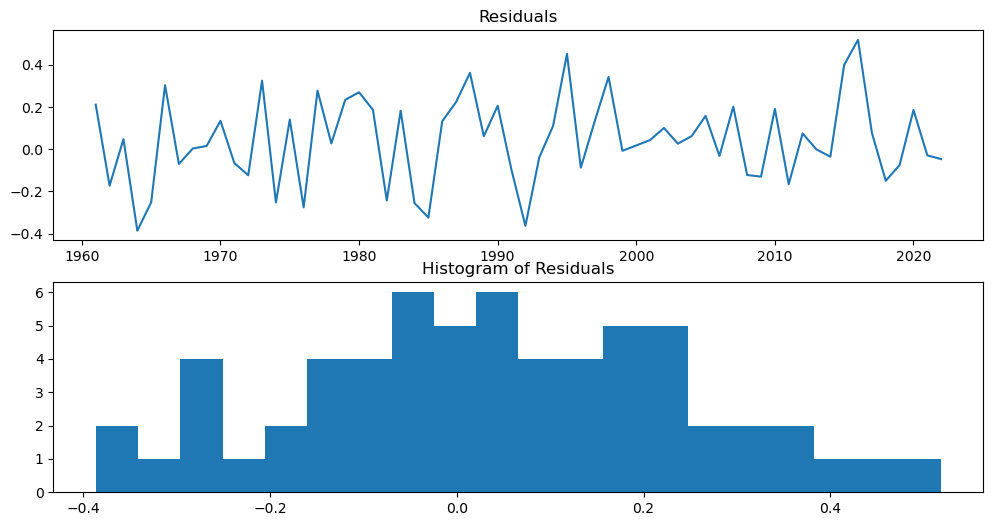

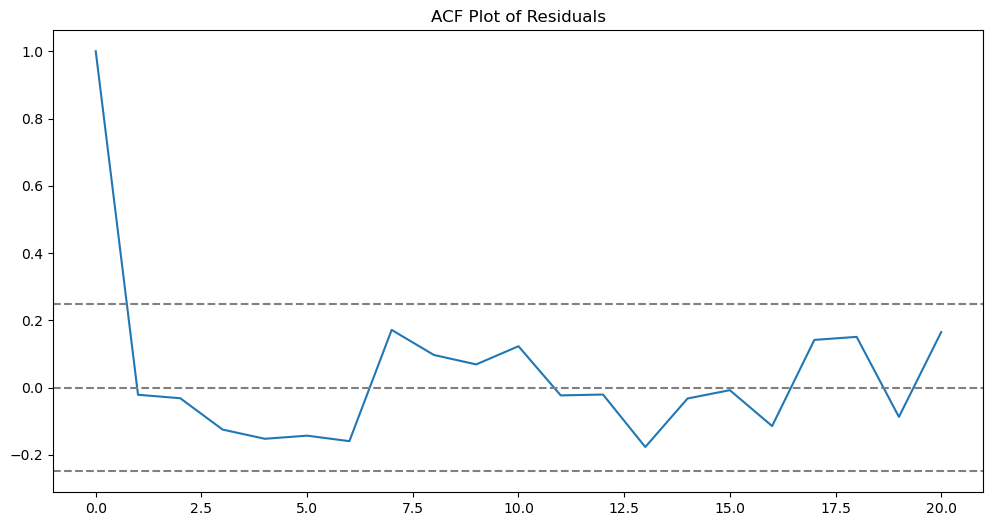

In [44]:
# Check residuals
residuals = model_fit.resid
plt.figure(figsize=(12,6))
plt.subplot(211)
plt.plot(residuals)
plt.title('Residuals')
plt.subplot(212)
plt.hist(residuals, bins=20)
plt.title('Histogram of Residuals')
plt.show()

# ACF plot of residuals
plt.figure(figsize=(12,6))
plt.plot(acf(residuals, nlags=20))
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(residuals)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(residuals)), linestyle='--', color='gray')
plt.title('ACF Plot of Residuals')
plt.show()

**Residual Analysis:**
- Histogram: Residuals are mostly between -0.4 and 0.4, indicating a good fit with minor skewness.
- ACF of Residuals: Residuals do not show significant autocorrelation, indicating that the model has captured most of the data's structure.

In [45]:
# Forecast
forecast_steps = 25
forecast = model_fit.forecast(steps=forecast_steps)

In [46]:
# Generate index for the forecast
last_year = 2022
forecast_years = [last_year + i for i in range(1, forecast_steps + 1)]

# Convert forecast to numpy array
forecast_values = forecast.to_numpy()

# Create a DataFrame for the forecasted values
forecast_df = pd.DataFrame(forecast_values, index=forecast_years, columns=['Forecast'])

forecast_df

,Forecast
2023,1.508885
2024,1.560213
2025,1.475293
2026,1.448509
2027,1.508123
2028,1.515989
2029,1.481753
2030,1.476464
2031,1.500149
2032,1.500892


In [47]:
forecast_df.to_csv('forecast.csv')

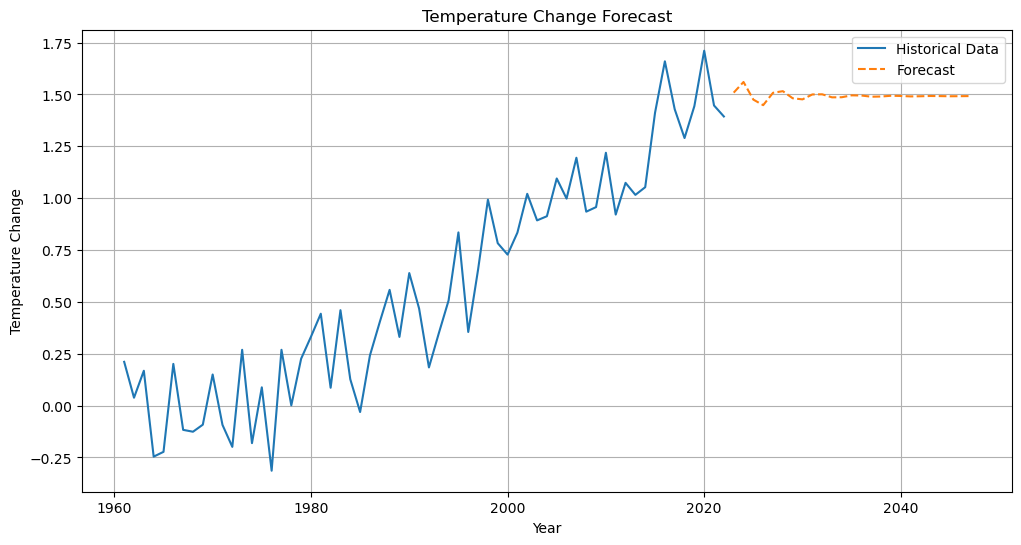

In [48]:
# Plot historical data and forecast
plt.figure(figsize=(12, 6))
plt.plot(world_melted.index, world_melted['Temperature_Change'], label='Historical Data')
plt.plot(forecast_df.index, forecast_df['Forecast'], label='Forecast', linestyle='--')
plt.title('Temperature Change Forecast')
plt.xlabel('Year')
plt.ylabel('Temperature Change')
plt.legend()
plt.grid(True)
plt.show()

- The graph depicts the historical trend of temperature change over the years, represented by the blue line, and a forecast of future temperature change trends for the next 25 years, represented by the orange dashed line.
- The forecast line indicates that the temperature is likely to continue fluctuating, with periods of warming and cooling. However, the overall trend suggests a gradual increase in temperature over the next 25 years, possibly influenced by factors such as greenhouse gas emissions and climate change.
- It is important to note that forecasting models have inherent uncertainties, and the actual future temperature changes may deviate from the forecast due to various factors, including changes in climate policies, technological advancements, and unforeseen events.

## **Conclusion:**
The project aimed at an exploratory data analysis and time series analysis of the Climate Change Indicators Dataset. The objectives included data distribution analysis, trend analysis, correlation analysis, regional analysis, time series analysis, and forecasting. The conclusions from these analyses are as follows:

**Analysis and Insights**

1. Average Temperature Change: A significant increase in average temperature from 1961 to 2022, showing a clear upward trend. The temperature change has become more pronounced since the 1980s.
2. Regional Temperature Change: Early years until 1980 show significant temperature variability. A sharp rise in temperature changes around 2010. All continents exhibit a rising temperature trend, with Europe and Asia showing the most significant increases, especially in recent decades.
3. Trend Analysis of Other Indicators: Atmospheric CO2 levels, mean sea levels, and ocean heat anomaly all show an upward trend, characterized by a rapid increase in the recent decade.
4. Correlation Analysis:Strong relation between temperature change and atmospheric CO2 levels, and mean sea levels.

**Key Findings**
1. Pronounced Increases in Temperature in Recent Decades After 1990:
    - Time series analysis indicates pronounced growth in temperature after 1990.
    - Variability in temperature is significantly reduced after 2000.
    - Change point detection shows a significant change point in the late 1990s, supporting the hypothesis.
    - All the maximum temperatures were recorded in the second half of the last decade.

2. Europe and Northern Asia Experiencing Rapid Warming:
    - Regional analysis shows Europe and Asia are the top two regions experiencing temperature change.
    - Majority of the top countries with maximum temperature changes are located in these regions.
    - The maximum average temperature change is recorded at 3.6°C in Russia, belonging to this region.

3. Impact on Sea Levels and Ocean Heat Content:
    - Mean sea levels have risen significantly from approximately -175 mm in 1880 to over 60 mm in 2022, reflecting the impact of melting polar ice caps and thermal expansion of seawater.
    - Ocean heat content shows an upward trend, indicating increased absorption of heat by the oceans.

**Climate Change Implications**
1. Real-Life Scenario: 
    - These findings highlight the accelerating pace of global warming, particularly in the northern hemisphere, affecting both human and natural systems. 
    - Rising sea levels pose a threat to coastal communities, leading to increased flooding, erosion, and habitat loss.
2. Influence of Indicators: 
    - Increased atmospheric CO2 levels directly correlate with the rise in global temperatures and sea levels, underscoring the importance of reducing greenhouse gas emissions. 
    - The warming of oceans contributes to more severe weather patterns, affecting marine life and human activities dependent on ocean resources.
3. Urgency of Mitigation and Adaptation Efforts:
    - The rapid warming in Europe and Northern Asia calls for urgent mitigation efforts to reduce emissions and adapt to changing climate conditions.
    - Global cooperation and policy interventions are crucial to address the interconnected impacts of climate change indicators.


In summary, this project provides a comprehensive analysis of climate change indicators, highlighting significant trends and correlations. The findings underscore the urgent need for action to mitigate and adapt to climate change, particularly in regions experiencing rapid warming. Understanding these trends and their implications is critical for developing effective strategies to combat climate change and protect vulnerable ecosystems and communities.